In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # Les encodage ici
from sklearn.pipeline import Pipeline


In [2]:
path = "df_model.csv"

In [3]:
# functions 
# import cleaned data
def import_data (path) :
    df = pd.read_csv (path, delimiter = ",")
    #remove default csv index
    df.drop(["Unnamed: 0"], axis = 1 , inplace = True)
    return df

# parsing date
def parse_date (df):
    # Convert date_mutation dtypes (object => datetime)
    df ["date_mutation"] = df ["date_mutation"].map(pd.to_datetime)   
    return df 


# Delete rows with NaN & and return 10% of cleaned data
def delete_nan (df) :
    df_ = df.copy()
    # indice des lignes dont les valeurs foncières sont vides 
    index_nan = df.index[df[df.columns].isnull().any(axis = 1)]
    #index_nan.shape
    # supprimer ces lignes
    df_.drop(index_nan , 0, inplace = True)
    # réinitialiser les indices
    df_.reset_index(drop = True, inplace=True)
    return df_


In [29]:
#import data
df = import_data(path)

In [22]:
df.columns

Index(['date_mutation', 'valeur_fonciere', 'code_postal',
       'surface_reelle_bati', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [33]:
df.head()

,date_mutation,valeur_fonciere,code_postal,surface_reelle_bati,surface_terrain,longitude,latitude
0,2016-07-13,55000.0,9400.0,100.0,415.0,1.630904,42.879268
1,2016-05-27,40000.0,50510.0,60.0,72.0,-1.463172,48.904642
2,2016-03-24,180000.0,44200.0,60.0,430.0,-1.525217,47.190559
3,2016-04-16,23000.0,85190.0,170.0,356.0,-1.687929,46.753776
4,2016-03-07,60000.0,69430.0,100.0,1987.0,4.546937,46.206473


In [33]:
X = df[["code_postal","surface_reelle_bati","surface_terrain", "longitude","latitude"]]
y = df.valeur_fonciere

In [34]:

# Execute preprocessing & train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [36]:
pipe_poly = Pipeline([ ('scl', StandardScaler()),
                       ('polynomial', PolynomialFeatures(3)),
                       ('clf', LinearRegression())])
pipe_poly.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('clf', LinearRegression())])

In [38]:
pipe_poly.score(X_train,y_train)

0.015941401621610396

In [32]:
y.head()


0     55000.0
1     40000.0
2    180000.0
3     23000.0
4     60000.0
Name: valeur_fonciere, dtype: float64

In [22]:
import pickle

In [25]:
filename = 'finalized_model.sav'
pickle.dump(pipe_poly, open(filename, 'wb'))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       0.357139      0.019922         0.041674        0.002513     {}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.00379           0.003177            0.00323         0.003399   

   std_test_score  rank_test_score  
0        0.000277                1  
best_index 0
best_score 0.0033985770374046855
best_params {}
##### CV Results
mean_score 0.0033085290281778647
Model coefficients:  [('code_postal', 365634.4835142159), ('surface_reelle_bati', 192262.45171659804), ('surface_terrain', 271498.06401457253), ('longitude', 89209.8195234003), ('latitude', 1

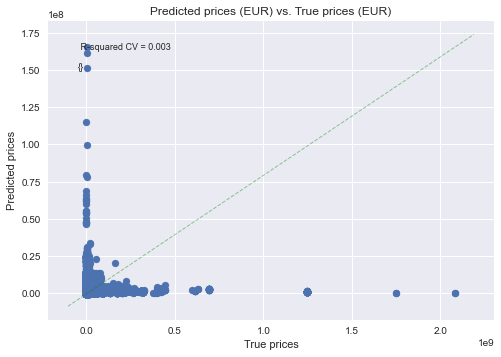

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time=  59.2s
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time=  59.2s
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time=  57.7s
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       58.56363      0.707075         0.226387         0.02682   

  param_clf__colsample_bytree param_clf__gamma param_clf__max_depth  \
0                           1             0.01                    5   

  param_clf__min_child_weight param_clf__subsample  \
0                           6                  0.7   

                                              params  split0_test_score  \
0  {'clf__colsample_bytree': 1, 'clf__gamma': 0.0...           0.6

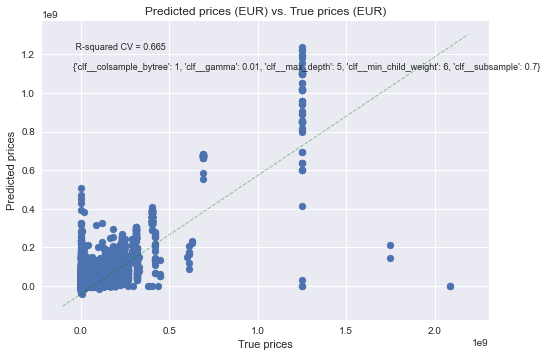

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .................................clf__n_neighbors=5; total time=  15.9s
[CV] END .................................clf__n_neighbors=5; total time=  15.6s
[CV] END .................................clf__n_neighbors=5; total time=  16.3s
[CV] END ................................clf__n_neighbors=10; total time=  20.3s
[CV] END ................................clf__n_neighbors=10; total time=  19.5s
[CV] END ................................clf__n_neighbors=10; total time=  18.7s
[CV] END ................................clf__n_neighbors=15; total time=  20.8s
[CV] END ................................clf__n_neighbors=15; total time=  21.5s
[CV] END ................................clf__n_neighbors=15; total time=  21.7s
[CV] END ................................clf__n_neighbors=25; total time=  26.0s
[CV] END ................................clf__n_neighbors=25; total time=  26.5s
[CV] END ................................clf__n_n

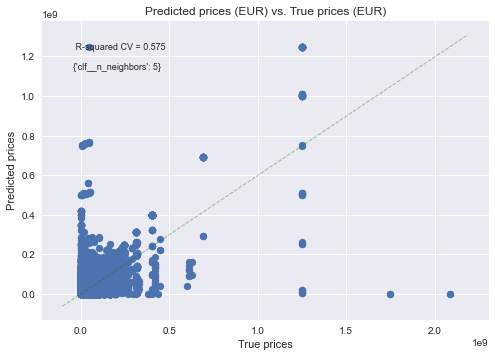

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................clf__alpha=0.01; total time=   0.4s
[CV] END ....................................clf__alpha=0.01; total time=   0.4s
[CV] END ....................................clf__alpha=0.01; total time=   0.4s
[CV] END .....................................clf__alpha=0.1; total time=   0.4s
[CV] END .....................................clf__alpha=0.1; total time=   0.4s
[CV] END .....................................clf__alpha=0.1; total time=   0.3s
[CV] END .......................................clf__alpha=1; total time=   0.4s
[CV] END .......................................clf__alpha=1; total time=   0.3s
[CV] END .......................................clf__alpha=1; total time=   0.4s
[CV] END ......................................clf__alpha=10; total time=   0.3s
[CV] END ......................................clf__alpha=10; total time=   0.4s
[CV] END ......................................cl

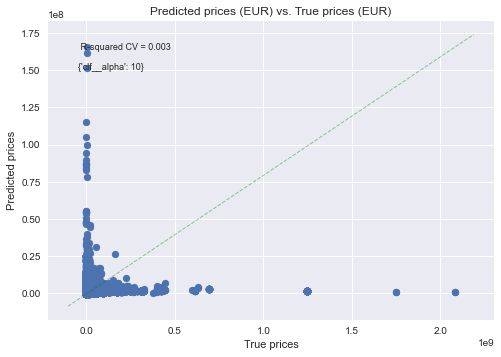

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................clf__alpha=0.01; total time=   0.3s
[CV] END ....................................clf__alpha=0.01; total time=   0.2s
[CV] END ....................................clf__alpha=0.01; total time=   0.2s
[CV] END .....................................clf__alpha=0.1; total time=   0.2s
[CV] END .....................................clf__alpha=0.1; total time=   0.2s
[CV] END .....................................clf__alpha=0.1; total time=   0.2s
[CV] END .......................................clf__alpha=1; total time=   0.2s
[CV] END .......................................clf__alpha=1; total time=   0.2s
[CV] END .......................................clf__alpha=1; total time=   0.2s
[CV] END ......................................clf__alpha=10; total time=   0.2s
[CV] END ......................................clf__alpha=10; total time=   0.2s
[CV] END ......................................cl

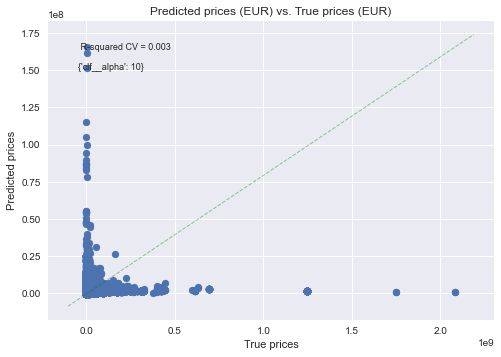

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...............................polynomial__degree=2; total time=   2.2s
[CV] END ...............................polynomial__degree=2; total time=   2.1s
[CV] END ...............................polynomial__degree=2; total time=   2.1s
[CV] END ...............................polynomial__degree=3; total time=   8.2s
[CV] END ...............................polynomial__degree=3; total time=   8.2s
[CV] END ...............................polynomial__degree=3; total time=   7.3s
[CV] END ...............................polynomial__degree=4; total time=  25.1s
[CV] END ...............................polynomial__degree=4; total time=  24.1s
[CV] END ...............................polynomial__degree=4; total time=  25.8s
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.967417      0.045771         0.269850        0.023118   
1       7.413915      0.381900         0.573872        0.097315 

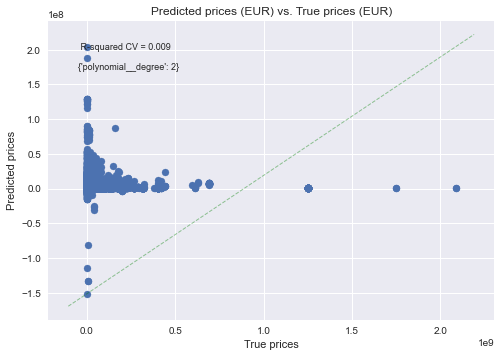

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   1.4s
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   1.6s
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   1.5s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   1.3s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   1.3s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   1.4s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   1.3s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   1.4s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   1.6s
[CV] END ........clf__max_depth=2, clf__min_samples_leaf=100; total time=   1.6s
[CV] END ........clf__max_depth=2, clf__min_samples_leaf=100; total time=   1.4s
[CV] END ........clf__max_depth=2, clf__min_samp

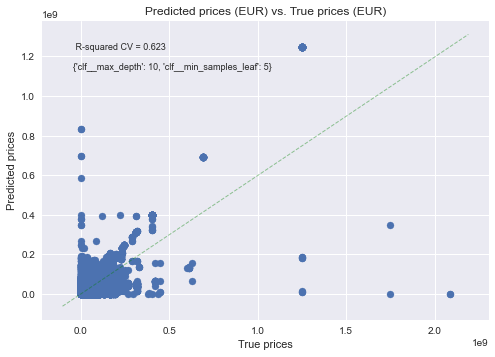

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   5.6s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   5.7s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   6.1s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=  11.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=  12.6s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=  12.4s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=  28.2s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=  29.1s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=  27.5s
[CV] END clf__max_depth=1, clf__max_features=1, clf__n_estimators=10; total time=   2.0s
[CV] END clf__max_dept

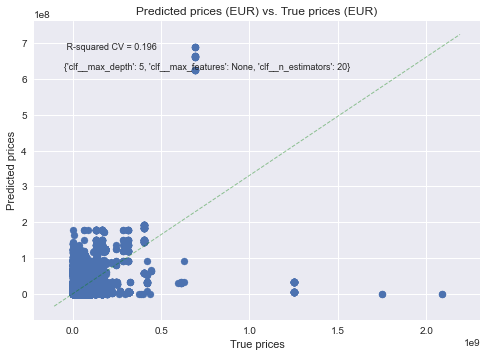

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  14.3s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  21.0s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  40.7s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  50.9s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  28.7s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  43.8s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 2.2min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 2.7min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 2.7min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 3.1min
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 2.5min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 2.9min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 3.4min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 3.3min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 3.1min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 3.6min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 3.2min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 3.6min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  48.1s
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=   9.1s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  48.8s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  45.2s
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  38.8s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  45.7s
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 2.2min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 2.7min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 2.8min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 2.8min
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  10.5s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 2.8min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 3.2min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 3.3min


In [64]:

plt.style.use('seaborn')



def model(pipeline, parameters, X_train, y_train, X, y):

    grid_obj = GridSearchCV(estimator=pipeline,
                            param_grid=parameters,
                            cv=3,
                            scoring='r2',
                            verbose=2,
                            n_jobs=1,
                            refit=True)
    grid_obj.fit(X_train, y_train)

    '''Results'''

    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)

    print("##### Results")
    print(results_sorted)

    print("best_index", grid_obj.best_index_)
    print("best_score", grid_obj.best_score_)
    print("best_params", grid_obj.best_params_)

    '''Cross Validation'''

    estimator = grid_obj.best_estimator_
    '''
    if estimator.named_steps['scl'] == True:
        X = (X - X.mean()) / (X.std())
        y = (y - y.mean()) / (y.std())
    '''
    shuffle = KFold(n_splits=5,
                    shuffle=True,
                    random_state=0)
    cv_scores = cross_val_score(estimator,
                                X,
                                y.values.ravel(),
                                cv=shuffle,
                                scoring='r2')
    print("##### CV Results")
    print("mean_score", cv_scores.mean())

    '''Show model coefficients or feature importances'''

    try:
        print("Model coefficients: ", list(zip(list(X), estimator.named_steps['clf'].coef_)))
    except:
        print("Model does not support model coefficients")

    try:
        print("Feature importances: ", list(zip(list(X), estimator.named_steps['clf'].feature_importances_)))
    except:
        print("Model does not support feature importances")

    '''Predict along CV and plot y vs. y_predicted in scatter'''

    y_pred = cross_val_predict(estimator, X, y, cv=shuffle)

    plt.scatter(y, y_pred)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    plt.annotate(' R-squared CV = {}'.format(round(float(cv_scores.mean()), 3)), size=9,
             xy=(xmin,ymax), xytext=(10, -15), textcoords='offset points')
    plt.annotate(grid_obj.best_params_, size=9,
                 xy=(xmin, ymax), xytext=(10, -35), textcoords='offset points', wrap=True)
    plt.title('Predicted prices (EUR) vs. True prices (EUR)')
    plt.show()


# Pipeline and Parameters - Linear Regression

pipe_ols = Pipeline([('scl', StandardScaler()),
           ('clf', LinearRegression())])

param_ols = {}

# Pipeline and Parameters - XGBoost

pipe_xgb = Pipeline([('clf', xgb.XGBRegressor())])

param_xgb = {'clf__max_depth':[5],
             'clf__min_child_weight':[6],
             'clf__gamma':[0.01],
             'clf__subsample':[0.7],
             'clf__colsample_bytree':[1]}

# Pipeline and Parameters - KNN

pipe_knn = Pipeline([('clf', KNeighborsRegressor())])

param_knn = {'clf__n_neighbors':[5, 10, 15, 25, 30]}

# Pipeline and Parameters - Lasso

pipe_lasso = Pipeline([('scl', StandardScaler()),
           ('clf', Lasso(max_iter=1500))])

param_lasso = {'clf__alpha': [0.01, 0.1, 1, 10]}

# Pipeline and Parameters - Ridge

pipe_ridge = Pipeline([('scl', StandardScaler()),
           ('clf', Ridge())])

param_ridge = {'clf__alpha': [0.01, 0.1, 1, 10]}

# Pipeline and Parameters - Polynomial Regression

pipe_poly = Pipeline([('scl', StandardScaler()),
                       ('polynomial', PolynomialFeatures()),
                       ('clf', LinearRegression())])

param_poly = {'polynomial__degree': [2, 3, 4]}


# Pipeline and Parameters - Decision Tree Regression

pipe_tree = Pipeline([('clf', DecisionTreeRegressor())])

param_tree = {'clf__max_depth': [2, 5, 10],
             'clf__min_samples_leaf': [5,10,50,100]}

# Pipeline and Parameters - Random Forest

pipe_forest = Pipeline([('clf', RandomForestRegressor())])

param_forest = {'clf__n_estimators': [10, 20, 50],
                'clf__max_features': [None, 1, 2],
                'clf__max_depth': [1, 2, 5]}

# Pipeline and Parameters - MLP Regression

pipe_neural = Pipeline([('scl', StandardScaler()),
                        ('clf', MLPRegressor())])

param_neural = {'clf__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'clf__hidden_layer_sizes': [(5),(10,10),(7,7,7)],
                'clf__solver': ['lbfgs'],
                'clf__activation': ['relu', 'tanh'],
                'clf__learning_rate' : ['constant', 'invscaling']}


# Execute model hyperparameter tuning and crossvalidation

model(pipe_ols, param_ols, X_train, y_train, X, y)
model(pipe_xgb, param_xgb, X_train, y_train, X, y)
model(pipe_knn, param_knn, X_train, y_train, X, y)
model(pipe_lasso, param_lasso, X_train, y_train, X, y)
model(pipe_ridge, param_ridge, X_train, y_train, X, y)
model(pipe_poly, param_poly, X_train, y_train, X, y)
model(pipe_tree, param_tree, X_train, y_train, X, y)
model(pipe_forest, param_forest, X_train, y_train, X, y)
model(pipe_neural, param_neural, X_train, y_train, X, y)




In [10]:


def model(pipeline, parameters, X_train, y_train, X, y):

    grid_obj = GridSearchCV(estimator=pipeline,
                            param_grid=parameters,
                            cv=3,
                            scoring='r2',
                            verbose=2,
                            n_jobs=1,
                            refit=True)
    grid_obj.fit(X_train, y_train)

    '''Results'''

    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)

    print("##### Results")
    print(results_sorted)

    print("best_index", grid_obj.best_index_)
    print("best_score", grid_obj.best_score_)
    print("best_params", grid_obj.best_params_)

    '''Cross Validation'''

    estimator = grid_obj.best_estimator_
    '''
    if estimator.named_steps['scl'] == True:
        X = (X - X.mean()) / (X.std())
        y = (y - y.mean()) / (y.std())
    '''
    shuffle = KFold(n_splits=5,
                    shuffle=True,
                    random_state=0)
    cv_scores = cross_val_score(estimator,
                                X,
                                y.values.ravel(),
                                cv=shuffle,
                                scoring='r2')
    print("##### CV Results")
    print("mean_score", cv_scores.mean())

    '''Show model coefficients or feature importances'''

    try:
        print("Model coefficients: ", list(zip(list(X), estimator.named_steps['clf'].coef_)))
    except:
        print("Model does not support model coefficients")

    try:
        print("Feature importances: ", list(zip(list(X), estimator.named_steps['clf'].feature_importances_)))
    except:
        print("Model does not support feature importances")

    '''Predict along CV and plot y vs. y_predicted in scatter'''

    y_pred = cross_val_predict(estimator, X, y, cv=shuffle)

    plt.scatter(y, y_pred)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    plt.annotate(' R-squared CV = {}'.format(round(float(cv_scores.mean()), 3)), size=9,
             xy=(xmin,ymax), xytext=(10, -15), textcoords='offset points')
    plt.annotate(grid_obj.best_params_, size=9,
                 xy=(xmin, ymax), xytext=(10, -35), textcoords='offset points', wrap=True)
    plt.title('Predicted prices vs. True prices')
    plt.show()




# Execute preprocessing & train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)









$$ \large Execute \ model \ hyperparameter \ tuning \ and \ crossvalidation $$


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time= 1.3min
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time= 1.2min
[CV] END clf__colsample_bytree=1, clf__gamma=0.01, clf__max_depth=5, clf__min_child_weight=6, clf__subsample=0.7; total time= 1.1min
##### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      70.751714      3.374039         0.243093        0.007576   

  param_clf__colsample_bytree param_clf__gamma param_clf__max_depth  \
0                           1             0.01                    5   

  param_clf__min_child_weight param_clf__subsample  \
0                           6                  0.7   

                                              params  split0_test_score  \
0  {'clf__colsample_bytree': 1, 'clf__gamma': 0.0...           0.6

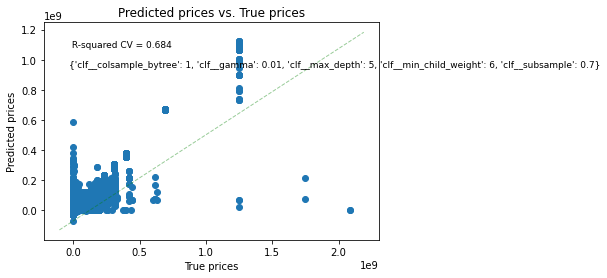

In [14]:
# Pipeline and Parameters - XGBoost

pipe_xgb = Pipeline([('clf', xgb.XGBRegressor())])

param_xgb = {'clf__max_depth':[5],
             'clf__min_child_weight':[6],
             'clf__gamma':[0.01],
             'clf__subsample':[0.7],
             'clf__colsample_bytree':[1]}

model(pipe_xgb, param_xgb, X_train, y_train, X, y)

In [20]:
import pickle
import joblib

In [14]:
X.columns

Index(['code_postal', 'surface_terrain', 'longitude', 'latitude'], dtype='object')

In [15]:
filename = 'finalized_model.sav'
pickle.dump(pipe_knn, open(filename, 'wb'))

In [17]:
joblib.dump(pipe_knn , filename)

['finalized_model.sav']

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .................................clf__n_neighbors=5; total time=  17.2s
[CV] END .................................clf__n_neighbors=5; total time=  17.7s
[CV] END .................................clf__n_neighbors=5; total time=  18.3s
[CV] END ................................clf__n_neighbors=10; total time=  17.2s
[CV] END ................................clf__n_neighbors=10; total time=  18.6s
[CV] END ................................clf__n_neighbors=10; total time=  20.8s
[CV] END ................................clf__n_neighbors=15; total time=  20.8s
[CV] END ................................clf__n_neighbors=15; total time=  21.8s
[CV] END ................................clf__n_neighbors=15; total time=  22.4s
[CV] END ................................clf__n_neighbors=25; total time=  24.4s
[CV] END ................................clf__n_neighbors=25; total time=  26.1s
[CV] END ................................clf__n_n

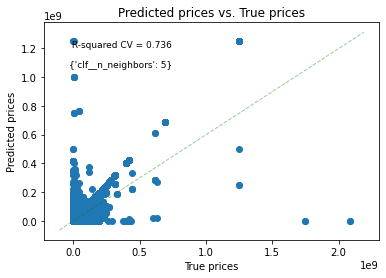

In [12]:
# Pipeline and Parameters - KNN

pipe_knn = Pipeline([('clf', KNeighborsRegressor())])

param_knn = {'clf__n_neighbors':[5, 10, 15, 25, 30]}

model(pipe_knn, param_knn, X_train, y_train, X, y)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................clf__alpha=0.01; total time=   0.5s
[CV] END ....................................clf__alpha=0.01; total time=   0.4s
[CV] END ....................................clf__alpha=0.01; total time=   0.4s
[CV] END .....................................clf__alpha=0.1; total time=   0.4s
[CV] END .....................................clf__alpha=0.1; total time=   0.4s
[CV] END .....................................clf__alpha=0.1; total time=   0.4s
[CV] END .......................................clf__alpha=1; total time=   0.3s
[CV] END .......................................clf__alpha=1; total time=   0.3s
[CV] END .......................................clf__alpha=1; total time=   0.3s
[CV] END ......................................clf__alpha=10; total time=   0.3s
[CV] END ......................................clf__alpha=10; total time=   0.4s
[CV] END ......................................cl

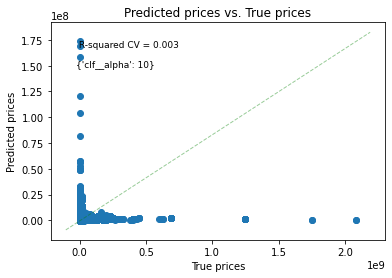

In [16]:

# Pipeline and Parameters - Lasso

pipe_lasso = Pipeline([('scl', StandardScaler()),
           ('clf', Lasso(max_iter=1500))])

param_lasso = {'clf__alpha': [0.01, 0.1, 1, 10]}

model(pipe_lasso, param_lasso, X_train, y_train, X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................clf__alpha=0.01; total time=   0.2s
[CV] END ....................................clf__alpha=0.01; total time=   0.2s
[CV] END ....................................clf__alpha=0.01; total time=   0.2s
[CV] END .....................................clf__alpha=0.1; total time=   0.2s
[CV] END .....................................clf__alpha=0.1; total time=   0.2s
[CV] END .....................................clf__alpha=0.1; total time=   0.2s
[CV] END .......................................clf__alpha=1; total time=   0.2s
[CV] END .......................................clf__alpha=1; total time=   0.2s
[CV] END .......................................clf__alpha=1; total time=   0.2s
[CV] END ......................................clf__alpha=10; total time=   0.2s
[CV] END ......................................clf__alpha=10; total time=   0.2s
[CV] END ......................................cl

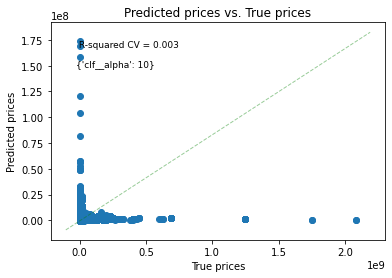

In [17]:
# Pipeline and Parameters - Ridge

pipe_ridge = Pipeline([('scl', StandardScaler()),
           ('clf', Ridge())])

param_ridge = {'clf__alpha': [0.01, 0.1, 1, 10]}

model(pipe_ridge, param_ridge, X_train, y_train, X, y)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............................polynomial__degree=2; total time=   1.4s
[CV] END ...............................polynomial__degree=2; total time=   1.4s
[CV] END ...............................polynomial__degree=2; total time=   1.4s
[CV] END ...............................polynomial__degree=3; total time=   4.3s
[CV] END ...............................polynomial__degree=3; total time=   4.3s
[CV] END ...............................polynomial__degree=3; total time=   4.3s
[CV] END ...............................polynomial__degree=4; total time=  12.2s
[CV] END ...............................polynomial__degree=4; total time=  12.4s
[CV] END ...............................polynomial__degree=4; total time=  12.4s
[CV] END ...............................polynomial__degree=5; total time=  29.2s
[CV] END ...............................polynomial__degree=5; total time=  29.5s
[CV] END ...............................polynomia

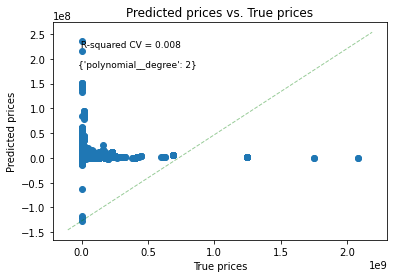

In [18]:
# Pipeline and Parameters - Polynomial Regression

pipe_poly = Pipeline([('scl', StandardScaler()),
                       ('polynomial', PolynomialFeatures()),
                       ('clf', LinearRegression())])

param_poly = {'polynomial__degree': [2, 3, 4,5]}

model(pipe_poly, param_poly, X_train, y_train, X, y)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   1.7s
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   1.7s
[CV] END ..........clf__max_depth=2, clf__min_samples_leaf=5; total time=   1.6s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   1.6s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   1.6s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=10; total time=   1.6s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   1.6s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   1.7s
[CV] END .........clf__max_depth=2, clf__min_samples_leaf=50; total time=   1.6s
[CV] END ........clf__max_depth=2, clf__min_samples_leaf=100; total time=   1.6s
[CV] END ........clf__max_depth=2, clf__min_samples_leaf=100; total time=   1.6s
[CV] END ........clf__max_depth=2, clf__min_samp

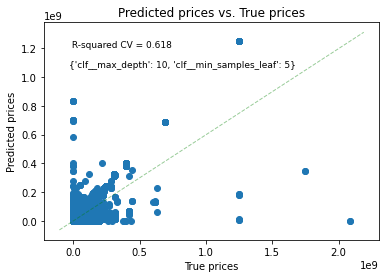

In [19]:
# Pipeline and Parameters - Decision Tree Regression

pipe_tree = Pipeline([('clf', DecisionTreeRegressor())])

param_tree = {'clf__max_depth': [2, 5, 10],
             'clf__min_samples_leaf': [5,10,50,100]}

model(pipe_tree, param_tree, X_train, y_train, X, y)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   6.6s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   6.6s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=10; total time=   6.5s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=  13.3s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=  13.2s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=20; total time=  13.0s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=  32.9s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=  32.8s
[CV] END clf__max_depth=1, clf__max_features=None, clf__n_estimators=50; total time=  30.8s
[CV] END clf__max_depth=1, clf__max_features=1, clf__n_estimators=10; total time=   2.3s
[CV] END clf__max_dept

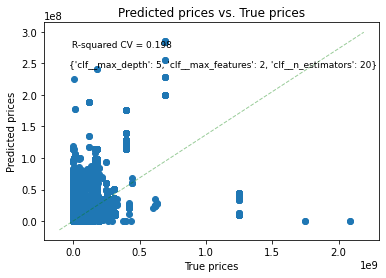

In [20]:

# Pipeline and Parameters - Random Forest

pipe_forest = Pipeline([('clf', RandomForestRegressor())])

param_forest = {'clf__n_estimators': [10, 20, 50],
                'clf__max_features': [None, 1, 2],
                'clf__max_depth': [1, 2, 5]}

model(pipe_forest, param_forest, X_train, y_train, X, y)


In [21]:
# Pipeline and Parameters - MLP Regression

pipe_neural = Pipeline([('scl', StandardScaler()),
                        ('clf', MLPRegressor())])

param_neural = {'clf__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'clf__hidden_layer_sizes': [(5),(10,10),(7,7,7)],
                'clf__solver': ['lbfgs'],
                'clf__activation': ['relu', 'tanh'],
                'clf__learning_rate' : ['constant', 'invscaling']}

model(pipe_neural, param_neural, X_train, y_train, X, y)



Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  49.3s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  34.6s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=  49.7s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  22.3s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  44.5s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  52.6s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 3.8min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 4.0min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time=74.1min
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  17.8s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=18.4min
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  14.7s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 4.9min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 5.6min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 5.4min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 5.3min
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  15.7s
[CV] END clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 2.7min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time= 1.2min
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time= 1.3min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time= 1.3min
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  32.6s
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  33.7s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 1.2min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 4.5min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time= 4.6min
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs; total time=  13.0s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 4.4min
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=   0.5s
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs; total time=  15.3s


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 6.2min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 5.1min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs; total time= 5.3min
[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 6.7min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 5.5min


C:\Users\ISEP is better\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs; total time= 4.8min
[CV] END clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=   0.8s
[CV] END clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=   0.1s
[CV] END clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs; total time=   0.1s
[CV] END clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=   0.1s
[CV] END clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs; total time=   0.3s


MemoryError: Unable to allocate 29.9 MiB for an array with shape (4, 981037) and data type float64